2025-03-03 13:18:31.474582: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1740987211.491268    5905 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1740987211.495743    5905 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-03 13:18:31.511159: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Found 78200 images belonging to 46 classes.


I0000 00:00:1740987215.140293    5905 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 739 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2060, pci bus id: 0000:01:00.0, compute capability: 7.5


Enter image name & path (without .png extension):  /home/soggygenus/Documents/CV/devanagari-character-recognition/1339


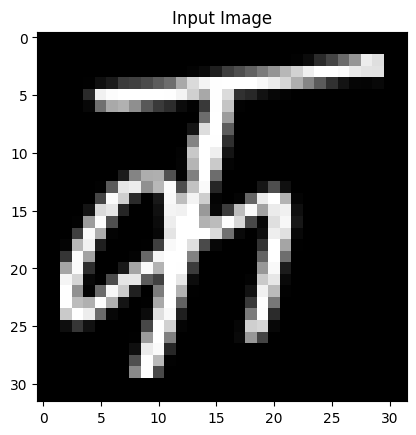

I0000 00:00:1740987232.557713    5971 service.cc:148] XLA service 0x7b0b5c005890 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1740987232.557735    5971 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 2060, Compute Capability 7.5
2025-03-03 13:18:52.564087: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1740987232.608493    5971 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-03-03 13:18:53.068920: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[1,32,30,30]{3,2,1,0}, u8[0]{0}) custom-call(f32[1,3,32,32]{3,2,1,0}, f32[32,3,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activatio

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted Class: character_1_ka


I0000 00:00:1740987233.464215    5971 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


In [1]:
from keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import os

# Data Preprocessing
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

training_set = train_datagen.flow_from_directory(
    '/home/soggygenus/Documents/CV/devanagari-character-recognition/train/',
    target_size=(32, 32),
    batch_size=32
)

# Load model
classifier = load_model('/home/soggygenus/Documents/CV/devanagari-character-recognition/devnagri_character_model.keras')
classifier.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Class Indices
classes = training_set.class_indices

# Load Image
image_path = input("Enter image name & path (without .png extension): ") + ".png"
if not os.path.exists(image_path):
    print("Error: File not found!")
    exit()

testImage = cv2.imread(image_path)
testImage = cv2.resize(testImage, (32, 32))
testimage = np.array(testImage) / 255.0  # Normalize
testimage = np.expand_dims(testimage, axis=0)  # Add batch dimension

# Display Image
plt.title("Input Image")
plt.imshow(cv2.cvtColor(testImage, cv2.COLOR_BGR2RGB))
plt.show()

# Predict Class
prediction = np.argmax(classifier.predict(testimage), axis=1)

# Output Result
for key, value in classes.items():
    if value == prediction:
        print("Predicted Class:", key)